1. Load dataset (may have hundreds of thousands of samples)
2. Select 2 features or reduce dimensions to 2D
3. Scale features
4. Train classifier on these 2 features
5. Decide mesh resolution h based on feature range
6. Create mesh grid using x_min, x_max, y_min, y_max
7. Predict Z for the mesh
8. Reshape Z to grid shape
9. Plot decision regions (contourf)
10. Overlay training points (or sample of points)
11. Analyze boundaries and misclassified areas



In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.datasets import load_wine


In [12]:
data = load_wine()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [13]:
X = df.iloc[:, :2]
y = data.target

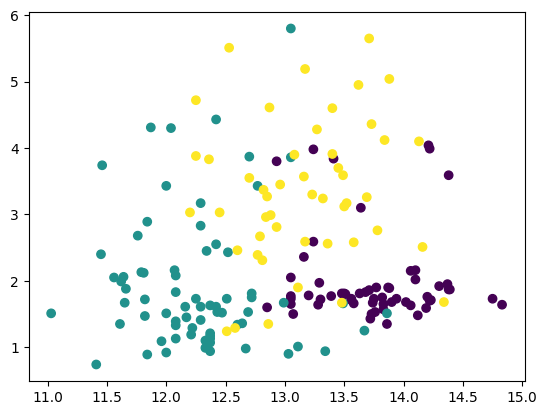

In [14]:
plt.scatter(X.iloc[:, 0], X.iloc[:,1], c = y)
y=y.astype('int')  

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_params = {
    "kernel": ['linear'],
    "C":[0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
    "degree": [2, 3, 4]
    }

In [21]:
grid = GridSearchCV(estimator = SVC(), param_grid=grid_params, cv=3, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.1, 1, ...], 'degree': [2, 3, ...], 'gamma': [0.001, 0.01, ...], 'kernel': ['linear']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is al

In [22]:
from sklearn.metrics import classification_report


best_model = grid.best_estimator_
print("Best Parameters: ", grid.best_params_)
print("Best Cross-validation Score: ", grid.best_score_)
y_pred = best_model.predict(X_test_scaled)

test_accuracy = best_model.score(X_test_scaled, y_test)   
print(f"Final Test Accuracy (Real World Score): {test_accuracy:.4f}") 
print(classification_report(y_test, y_pred))
train_accuracy = best_model.score(X_train_scaled, y_train)
print("Train Accuracy:", train_accuracy)

Best Parameters:  {'C': 2, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}
Best Cross-validation Score:  0.7890070921985816
Final Test Accuracy (Real World Score): 0.7778
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.92      0.86      0.89        14
           2       0.56      0.62      0.59         8

    accuracy                           0.78        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.79      0.78      0.78        36

Train Accuracy: 0.8028169014084507


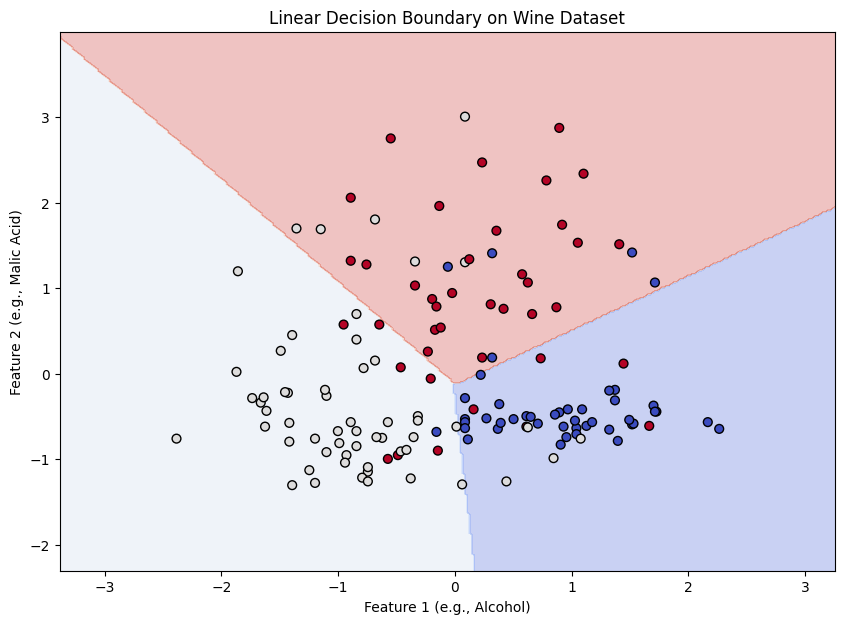

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Create the Grid (You already did this part)
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 2. Predict using the grid
# Note: Ensure 'grid' was trained ONLY on the same 2 columns used for xx and yy
Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 3. Plotting
plt.figure(figsize=(10, 7))

# Draw the colored "regions"
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

# Draw the actual data points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
            cmap='coolwarm', edgecolors='k', s=40)

plt.title("Linear Decision Boundary on Wine Dataset")
plt.xlabel("Feature 1 (e.g., Alcohol)")
plt.ylabel("Feature 2 (e.g., Malic Acid)")
plt.show()




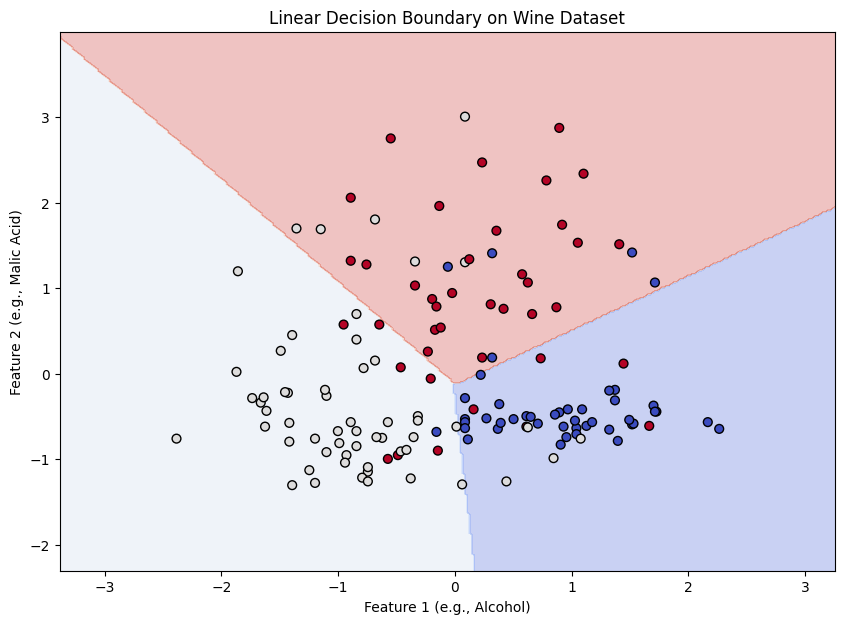

In [ ]:
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() -1 , X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() -1,  X_train_scaled[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))



Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 7))


plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
            cmap='coolwarm', edgecolors='k', s=40)

plt.title("Linear Decision Boundary on Wine Dataset")
plt.xlabel("Feature 1 (e.g., Alcohol)")
plt.ylabel("Feature 2 (e.g., Malic Acid)")
plt.show()
